In [19]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import matplotlib.colors as mcolors

# Add the src directory to the path - go up one level from notebooks, then to src
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "src"))

# Now import from the src modules
from utils import load_experiment_results, find_experiment_results
from visualization import plot_critical_mass_results

# Set better visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

# Critical Mass

In [16]:
# Path to the specific results file
results_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/critical_mass/critical_mass_20250411_223415_n_nodes_1000_total_steps_150.pkl"

# Load the results
with open(results_path, 'rb') as f:
    data = pickle.load(f)

# Examine the structure
print(f"Type of data: {type(data)}")
print(f"Keys in data: {list(data.keys()) if isinstance(data, dict) else 'Not a dictionary'}")

# If it's a nested structure with 'results' key
if isinstance(data, dict) and 'results' in data:
    results = data['results']
    print(f"Type of results: {type(results)}")
    print(f"Keys in results: {list(results.keys()) if isinstance(results, dict) else 'Not a dictionary'}")
else:
    # Just rename for consistency
    results = data

Type of data: <class 'dict'>
Keys in data: ['experiment', 'config', 'results', 'timestamp']
Type of results: <class 'dict'>
Keys in results: ['scale-free', 'small-world', 'random']


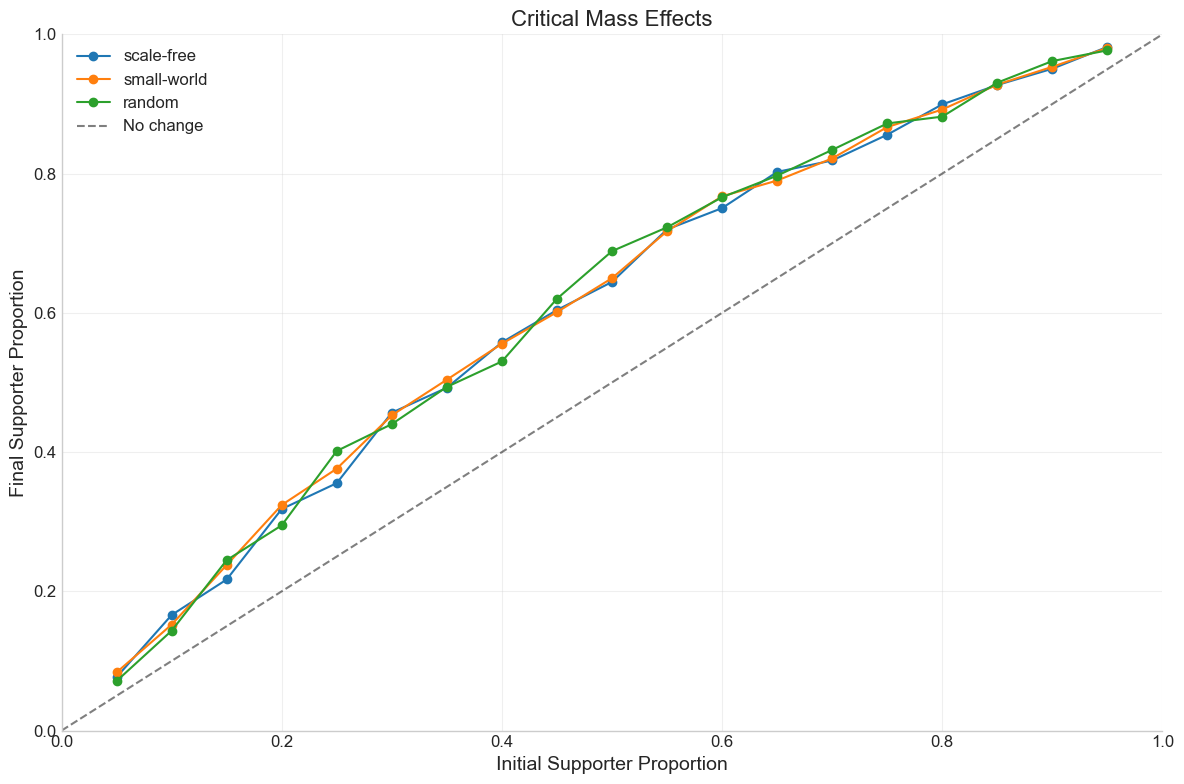

In [17]:
# Directly plot a simple version of critical mass results
if isinstance(results, dict):
    # Create a simple plot that doesn't rely on specific structure
    plt.figure(figsize=(12, 8))
    
    # Try to find network types in top level keys
    network_types = [k for k in results.keys() if isinstance(k, str) and k in ['scale-free', 'small-world', 'random']]
    
    if network_types:
        # Create the plot
        for network_type in network_types:
            if isinstance(results[network_type], dict) and 'initial_proportions' in results[network_type]:
                initial_proportions = results[network_type]['initial_proportions']
                final_supporters = results[network_type]['final_supporters']
                plt.plot(initial_proportions, final_supporters, 'o-', label=f"{network_type}")
        
        # Add reference line
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='No change')
        plt.xlabel('Initial Supporter Proportion')
        plt.ylabel('Final Supporter Proportion')
        plt.title('Critical Mass Effects')
        plt.grid(alpha=0.3)
        plt.legend()
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not identify network types in the data structure.")
        print("First-level keys:", list(results.keys()))
        
        # If results are nested under a key like 'results' or similar
        for potential_results_key in results.keys():
            if isinstance(results[potential_results_key], dict):
                print(f"Sub-keys under '{potential_results_key}':", list(results[potential_results_key].keys()))
else:
    print("Results is not a dictionary. Cannot process further.")

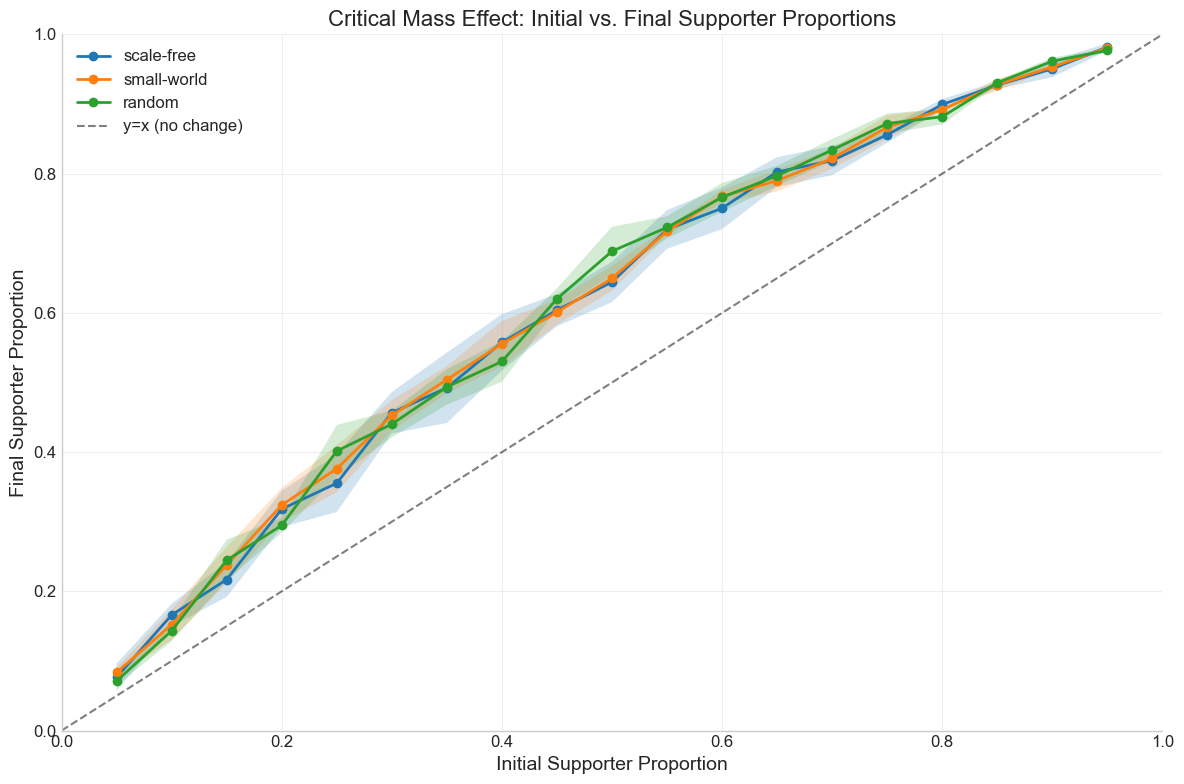

In [36]:
# Get the results part which contains the actual experiment data
results = data['results']
config = data.get('config', {})

# Extract the network types
network_types = list(results.keys())

# Plot the relationship between initial and final supporter proportions
plt.figure(figsize=(12, 8))

for network_type in network_types:
    initial_proportions = results[network_type]['initial_proportions']
    final_supporters = results[network_type]['final_supporters']
    final_supporters_std = results[network_type]['final_supporters_std']
    
    plt.plot(initial_proportions, final_supporters, 'o-', linewidth=2, label=network_type)
    plt.fill_between(initial_proportions, 
                    np.array(final_supporters) - np.array(final_supporters_std),
                    np.array(final_supporters) + np.array(final_supporters_std),
                    alpha=0.2)

# Add reference line (y=x)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='y=x (no change)')

plt.xlabel('Initial Supporter Proportion')
plt.ylabel('Final Supporter Proportion')
plt.title('Critical Mass Effect: Initial vs. Final Supporter Proportions')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Targeted Seeding

In [26]:
from model import SUPPORTER, UNDECIDED, OPPOSITION
import json

# Set better visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [32]:
# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/targeted_seeding/targeted_seeding_20250413_112252_n_nodes_1000_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    results = pickle.load(f)

# Print the structure of the loaded data
print(f"Type of results: {type(results)}")
print("Keys in results dictionary:" if isinstance(results, dict) else "Results is not a dictionary")
if isinstance(results, dict):
    print(list(results.keys()))
    for key in results:
        print(f"\nKey: {key}")
        print(f"Type: {type(results[key])}")
        if isinstance(results[key], dict):
            print(f"Nested keys: {list(results[key].keys())}")
# Load the summary info
summary_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/targeted_seeding_summary.json"
with open(summary_path, 'r') as f:
    summary = json.load(f)

Type of results: <class 'dict'>
Keys in results dictionary:
['experiment', 'config', 'results', 'timestamp']

Key: experiment
Type: <class 'str'>

Key: config
Type: <class 'dict'>
Nested keys: ['n_nodes', 'total_steps', 'num_trials', 'lambda_s', 'lambda_o', 'initial_supporter_percent']

Key: results
Type: <class 'dict'>
Nested keys: ['Random Seeding', 'High-Degree Seeding', 'Betweenness Seeding', 'Clustered Seeding']

Key: timestamp
Type: <class 'str'>


In [40]:
# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/targeted_seeding/targeted_seeding_20250413_112252_n_nodes_1000_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Check what experiment this actually is
print(f"Experiment type: {data.get('experiment', 'Unknown')}")
print(f"Keys in the data: {list(data.keys())}")

# Check what's in the results
results = data['results']
print(f"Keys in results: {list(results.keys())}")

# List a few strategies if they exist
if 'Random Seeding' in results or 'High-Degree Seeding' in results:
    print("This appears to be a targeted seeding experiment.")
    for strategy in ['Random Seeding', 'High-Degree Seeding', 'Betweenness Seeding', 'Clustered Seeding']:
        if strategy in results:
            print(f"Found strategy: {strategy}")
            print(f"Keys for this strategy: {list(results[strategy].keys())}")

Experiment type: targeted_seeding
Keys in the data: ['experiment', 'config', 'results', 'timestamp']
Keys in results: ['Random Seeding', 'High-Degree Seeding', 'Betweenness Seeding', 'Clustered Seeding']
This appears to be a targeted seeding experiment.
Found strategy: Random Seeding
Keys for this strategy: ['supporter_final', 'undecided_final', 'opposition_final', 'history', 'all_histories']
Found strategy: High-Degree Seeding
Keys for this strategy: ['supporter_final', 'undecided_final', 'opposition_final', 'history', 'all_histories']
Found strategy: Betweenness Seeding
Keys for this strategy: ['supporter_final', 'undecided_final', 'opposition_final', 'history', 'all_histories']
Found strategy: Clustered Seeding
Keys for this strategy: ['supporter_final', 'undecided_final', 'opposition_final', 'history', 'all_histories']


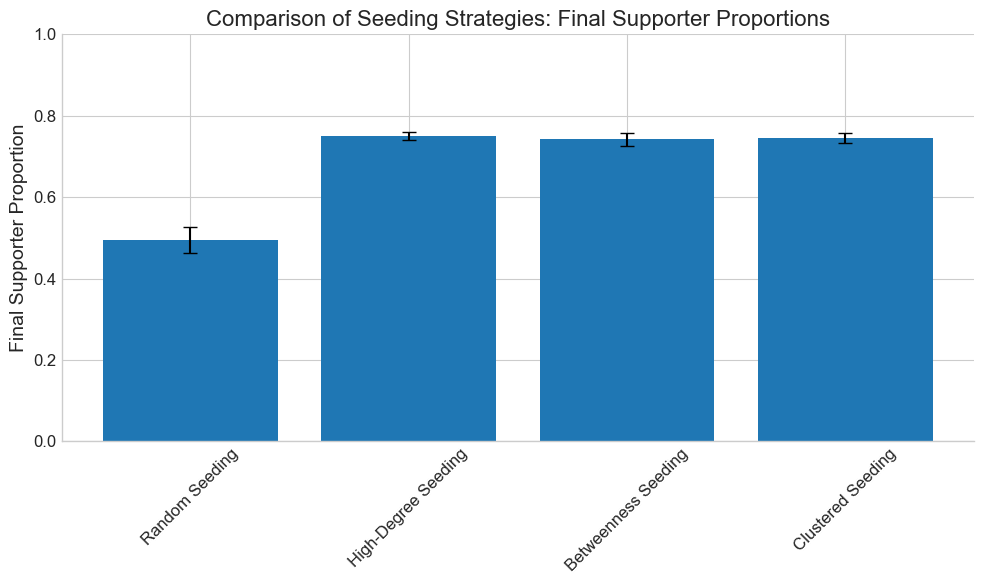

In [43]:
SUPPORTER_COLOR = '#FB9F89'  # Coral
UNDECIDED_COLOR = '#201E1F'  # Black
OPPOSITION_COLOR = '#50B2C0'  # Blue
COLOR_PALETTE = [SUPPORTER_COLOR, UNDECIDED_COLOR, OPPOSITION_COLOR]


# Get the results part which contains the actual experiment data
results = data['results']
config = data['config']

# Extract the strategies
strategies = list(results.keys())

# 1. Plot the final supporter proportions across different strategies
final_supporters = [np.mean(results[strategy]['supporter_final']) for strategy in strategies]
final_supporters_std = [np.std(results[strategy]['supporter_final']) for strategy in strategies]

plt.figure(figsize=(10, 6))
bars = plt.bar(strategies, final_supporters, yerr=final_supporters_std, capsize=5)
plt.ylabel('Final Supporter Proportion')
plt.title('Comparison of Seeding Strategies: Final Supporter Proportions')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

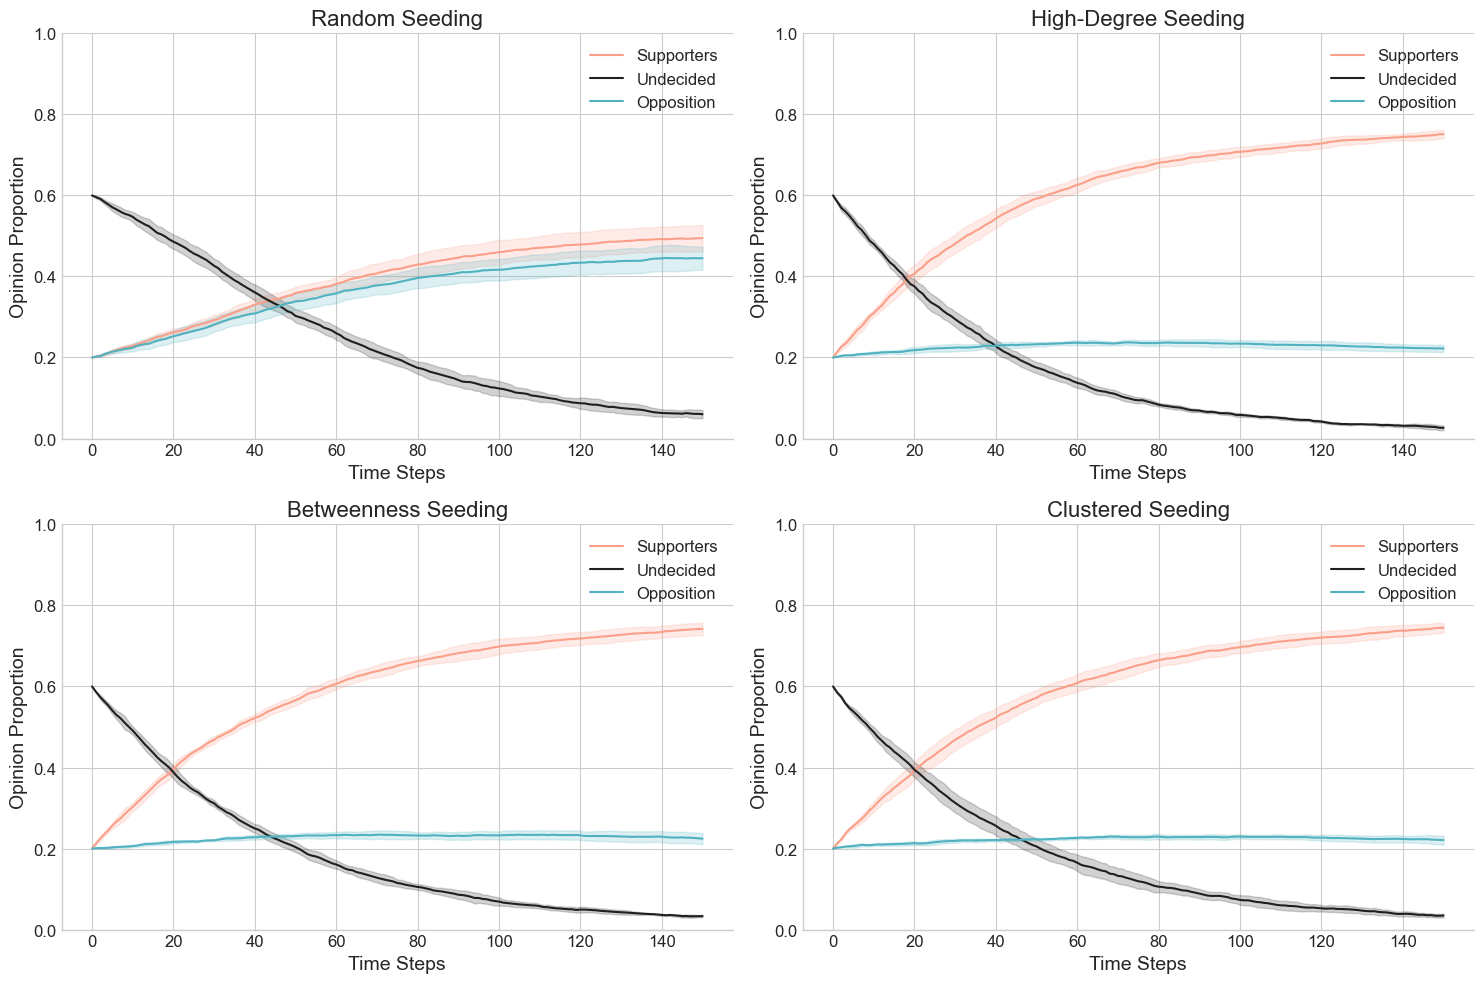

In [44]:
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(strategies):
    plt.subplot(2, 2, i+1)
    
    # Get the mean history across all trials
    all_histories = results[strategy]['all_histories']
    
    # Calculate mean and std for each time step across all trials
    num_steps = len(all_histories[0])
    supporters_data = np.zeros((len(all_histories), num_steps))
    undecided_data = np.zeros_like(supporters_data)
    opposition_data = np.zeros_like(supporters_data)
    
    # Collect data from all trials
    for k, hist in enumerate(all_histories):
        supporters_data[k] = [h[SUPPORTER] for h in hist]
        undecided_data[k] = [h[UNDECIDED] for h in hist]
        opposition_data[k] = [h[OPPOSITION] for h in hist]
    
    # Calculate means and standard deviations
    supporters_mean = np.mean(supporters_data, axis=0)
    supporters_std = np.std(supporters_data, axis=0)
    undecided_mean = np.mean(undecided_data, axis=0)
    undecided_std = np.std(undecided_data, axis=0)
    opposition_mean = np.mean(opposition_data, axis=0)
    opposition_std = np.std(opposition_data, axis=0)
    
    steps = range(num_steps)
    
    # Plot means with confidence intervals
    plt.plot(steps, supporters_mean, '-', color=SUPPORTER_COLOR, label='Supporters')
    plt.plot(steps, undecided_mean, '-', color=UNDECIDED_COLOR, label='Undecided')
    plt.plot(steps, opposition_mean, '-', color=OPPOSITION_COLOR, label='Opposition')
    
    plt.fill_between(steps, supporters_mean - supporters_std, supporters_mean + supporters_std, 
                    color=SUPPORTER_COLOR, alpha=0.2)
    plt.fill_between(steps, undecided_mean - undecided_std, undecided_mean + undecided_std, 
                    color=UNDECIDED_COLOR, alpha=0.2)
    plt.fill_between(steps, opposition_mean - opposition_std, opposition_mean + opposition_std, 
                    color=OPPOSITION_COLOR, alpha=0.2)
    
    plt.title(strategy)
    plt.xlabel('Time Steps')
    plt.ylabel('Opinion Proportion')
    plt.ylim(0, 1.0)
    plt.legend()

plt.tight_layout()
plt.show()

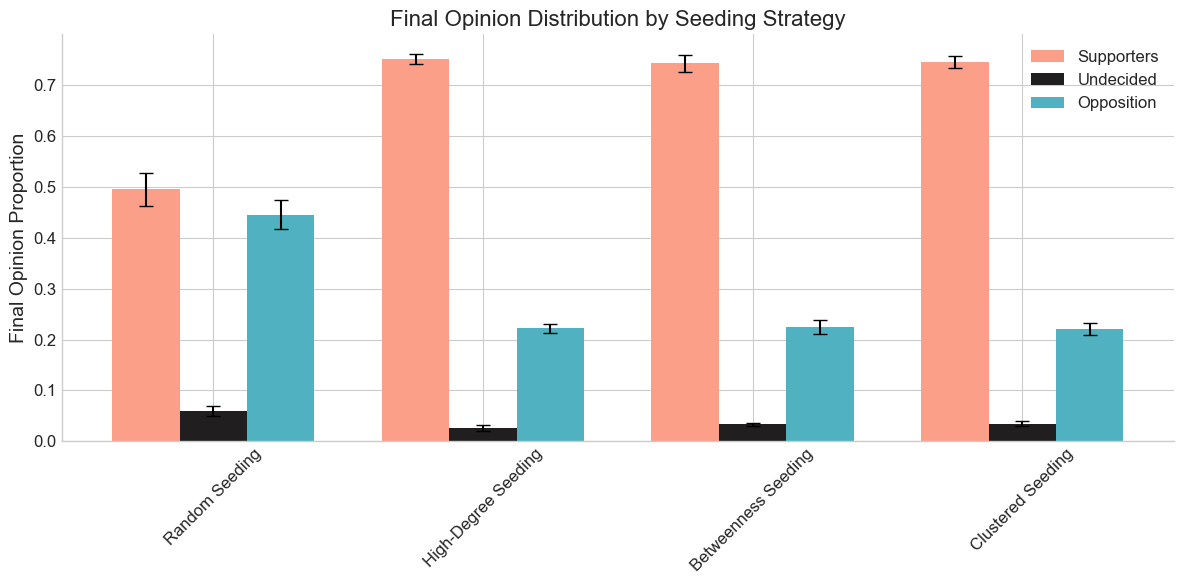

In [45]:
plt.figure(figsize=(12, 6))
x = np.arange(len(strategies))
width = 0.25

final_supporters = [np.mean(results[strategy]['supporter_final']) for strategy in strategies]
supporters_std = [np.std(results[strategy]['supporter_final']) for strategy in strategies]

final_undecided = [np.mean(results[strategy]['undecided_final']) for strategy in strategies]
undecided_std = [np.std(results[strategy]['undecided_final']) for strategy in strategies]

final_opposition = [np.mean(results[strategy]['opposition_final']) for strategy in strategies]
opposition_std = [np.std(results[strategy]['opposition_final']) for strategy in strategies]

plt.bar(x - width, final_supporters, width, label='Supporters', color=SUPPORTER_COLOR, yerr=supporters_std, capsize=5)
plt.bar(x, final_undecided, width, label='Undecided', color=UNDECIDED_COLOR, yerr=undecided_std, capsize=5)
plt.bar(x + width, final_opposition, width, label='Opposition', color=OPPOSITION_COLOR, yerr=opposition_std, capsize=5)

plt.ylabel('Final Opinion Proportion')
plt.title('Final Opinion Distribution by Seeding Strategy')
plt.xticks(x, strategies, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd

initial_supporter_percent = config.get('initial_supporter_percent', 'N/A')

summary_data = {
    'Strategy': strategies,
    'Final Supporters (mean)': [round(np.mean(results[s]['supporter_final']), 3) for s in strategies],
    'Final Supporters (std)': [round(np.std(results[s]['supporter_final']), 3) for s in strategies],
    'Final Undecided (mean)': [round(np.mean(results[s]['undecided_final']), 3) for s in strategies],
    'Final Opposition (mean)': [round(np.mean(results[s]['opposition_final']), 3) for s in strategies],
    'Initial Supporter %': initial_supporter_percent,
    'Supporter Growth': [round(np.mean(results[s]['supporter_final']) - initial_supporter_percent, 3) 
                        if isinstance(initial_supporter_percent, (int, float)) else 'N/A' 
                        for s in strategies]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Strategy,Final Supporters (mean),Final Supporters (std),Final Undecided (mean),Final Opposition (mean),Initial Supporter %,Supporter Growth
0,Random Seeding,0.495,0.033,0.060,0.445,0.2,0.295
1,High-Degree Seeding,0.751,0.010,0.026,0.222,0.2,0.551
2,Betweenness Seeding,0.742,0.016,0.033,0.224,0.2,0.542
3,Clustered Seeding,0.745,0.012,0.035,0.221,0.2,0.545


# Opponent Composition

In [55]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick

# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/opponent_composition/opponent_composition_20250413_113902_n_nodes_1000_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Load summary json
summary_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/opponent_composition_summary.json"
with open(summary_path, 'r') as f:
    summary = json.load(f)

# Extract configuration and results
config = data['config']
results = data['results']
experiment = data['experiment']
network_types = list(results.keys())

print(f"Experiment: {experiment}")
print(f"Network types: {network_types}")
print(f"Initial supporter percentage: {config.get('initial_supporter_percent', 'N/A')}")


Experiment: opponent_composition
Network types: ['scale-free', 'small-world', 'random']
Initial supporter percentage: 0.3


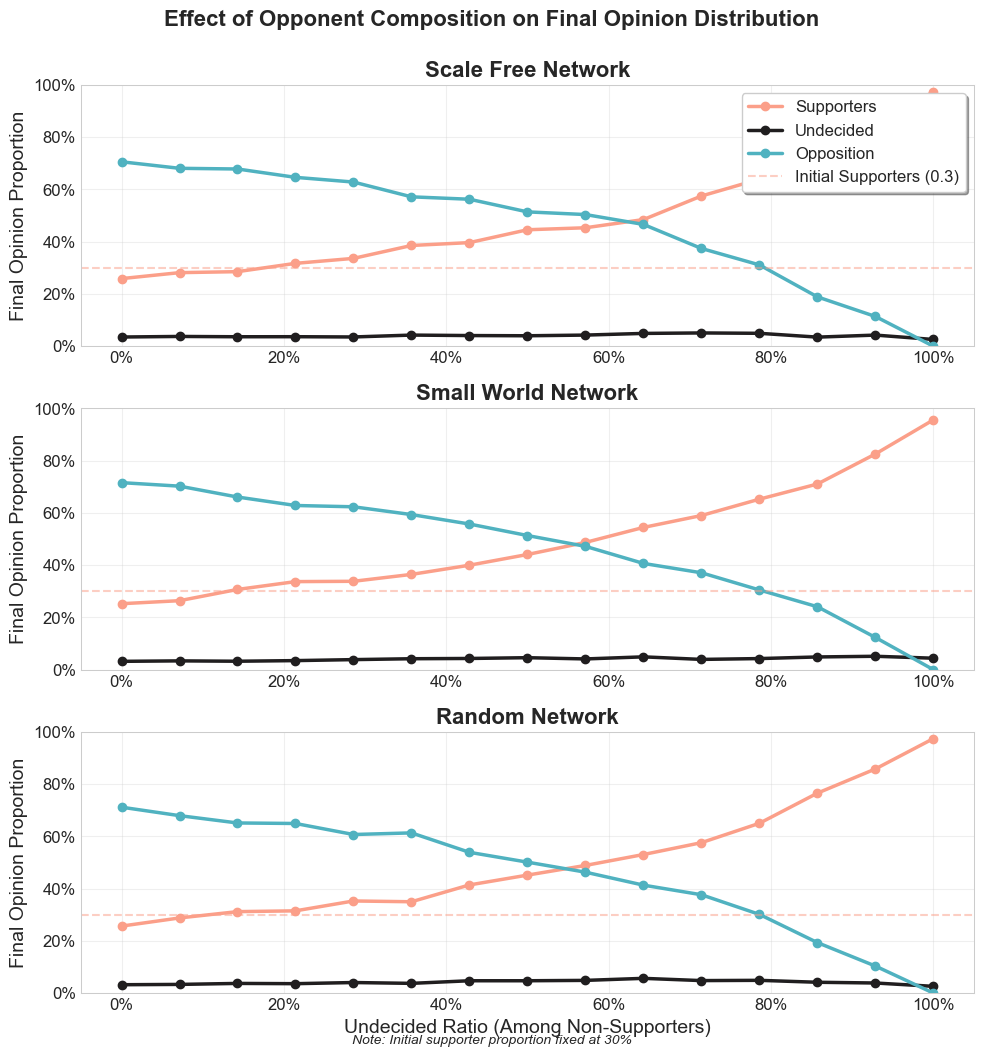

In [56]:
fig1 = plt.figure(figsize=(10, 3.5 * len(network_types)))
gs = GridSpec(len(network_types), 1, figure=fig1)

for i, network_type in enumerate(network_types):
    ax = fig1.add_subplot(gs[i, 0])
    undecided_ratios = results[network_type]['undecided_ratios']
    
    ax.plot(undecided_ratios, results[network_type]['supporter_final'], 'o-', 
            color=SUPPORTER_COLOR, linewidth=2.5, label='Supporters')
    ax.plot(undecided_ratios, results[network_type]['undecided_final'], 'o-', 
            color=UNDECIDED_COLOR, linewidth=2.5, label='Undecided')
    ax.plot(undecided_ratios, results[network_type]['opposition_final'], 'o-', 
            color=OPPOSITION_COLOR, linewidth=2.5, label='Opposition')
    
    # Add reference line for initial supporter percentage
    ax.axhline(y=initial_supporter_percent, color=SUPPORTER_COLOR, linestyle='--', alpha=0.5, 
               label=f'Initial Supporters ({initial_supporter_percent:.1f})')
    
    ax.set_ylabel('Final Opinion Proportion')
    ax.set_title(f'{network_type.replace("-", " ").title()} Network', fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Format x-axis as percentage
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add a box around the plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.75)
    
    if i == 0:
        ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
    
    if i == len(network_types) - 1:
        ax.set_xlabel('Undecided Ratio (Among Non-Supporters)')

plt.suptitle('Effect of Opponent Composition on Final Opinion Distribution', fontsize=16, fontweight='bold', y=0.995)
fig1.text(0.5, 0.01, 
          'Note: Initial supporter proportion fixed at {:.0%}'.format(initial_supporter_percent), 
          ha='center', fontsize=10, fontstyle='italic')
plt.tight_layout()
plt.savefig("opponent_composition_final_opinions.pdf")
plt.show()

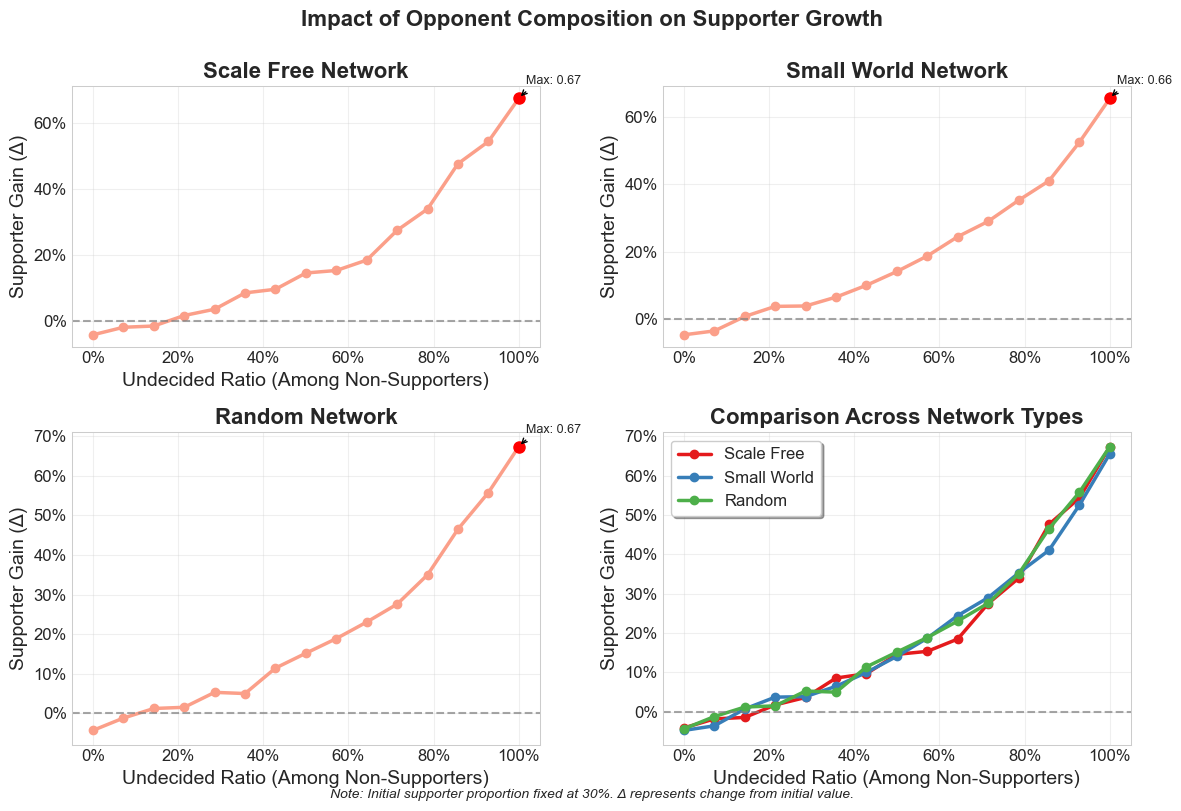

In [58]:
NETWORK_COLORS = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']


fig2 = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig2, height_ratios=[1, 1.2])

for i, network_type in enumerate(network_types[:3]):  # Limit to first 3 network types if there are more
    row, col = i // 2, i % 2
    ax = fig2.add_subplot(gs[row, col])
    
    undecided_ratios = results[network_type]['undecided_ratios']
    supporter_gain = np.array(results[network_type]['supporter_final']) - initial_supporter_percent
    
    ax.plot(undecided_ratios, supporter_gain, 'o-', color=SUPPORTER_COLOR, linewidth=2.5)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
    
    # Find and mark maximum gain
    max_idx = np.argmax(supporter_gain)
    max_gain = supporter_gain[max_idx]
    max_ratio = undecided_ratios[max_idx]
    
    ax.plot(max_ratio, max_gain, 'o', color='red', markersize=8)
    ax.annotate(f'Max: {max_gain:.2f}', 
                xy=(max_ratio, max_gain), xytext=(5, 10),
                textcoords='offset points', fontsize=9,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    ax.set_ylabel('Supporter Gain (Δ)')
    ax.set_title(f'{network_type.replace("-", " ").title()} Network', fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add a box around the plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.75)
    
    if row == 1 or col == 0:
        ax.set_xlabel('Undecided Ratio (Among Non-Supporters)')

# Add comparison panel
ax_comp = fig2.add_subplot(gs[1, 1:])

for i, network_type in enumerate(network_types):
    undecided_ratios = results[network_type]['undecided_ratios']
    supporter_gain = np.array(results[network_type]['supporter_final']) - initial_supporter_percent
    
    ax_comp.plot(undecided_ratios, supporter_gain, 'o-', linewidth=2.5, 
                 color=NETWORK_COLORS[i % len(NETWORK_COLORS)], 
                 label=network_type.replace("-", " ").title())

ax_comp.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
ax_comp.set_xlabel('Undecided Ratio (Among Non-Supporters)')
ax_comp.set_ylabel('Supporter Gain (Δ)')
ax_comp.set_title('Comparison Across Network Types', fontweight='bold')
ax_comp.grid(True, alpha=0.3)
ax_comp.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax_comp.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax_comp.legend(loc='best', frameon=True, fancybox=True, shadow=True)

# Add a box around the plot
for spine in ax_comp.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.75)

plt.suptitle('Impact of Opponent Composition on Supporter Growth', fontsize=16, fontweight='bold', y=0.995)
fig2.text(0.5, 0.01, 
          'Note: Initial supporter proportion fixed at {:.0%}. Δ represents change from initial value.'.format(initial_supporter_percent), 
          ha='center', fontsize=10, fontstyle='italic')
plt.tight_layout()
plt.savefig("opponent_composition_supporter_gain.pdf")
plt.show()

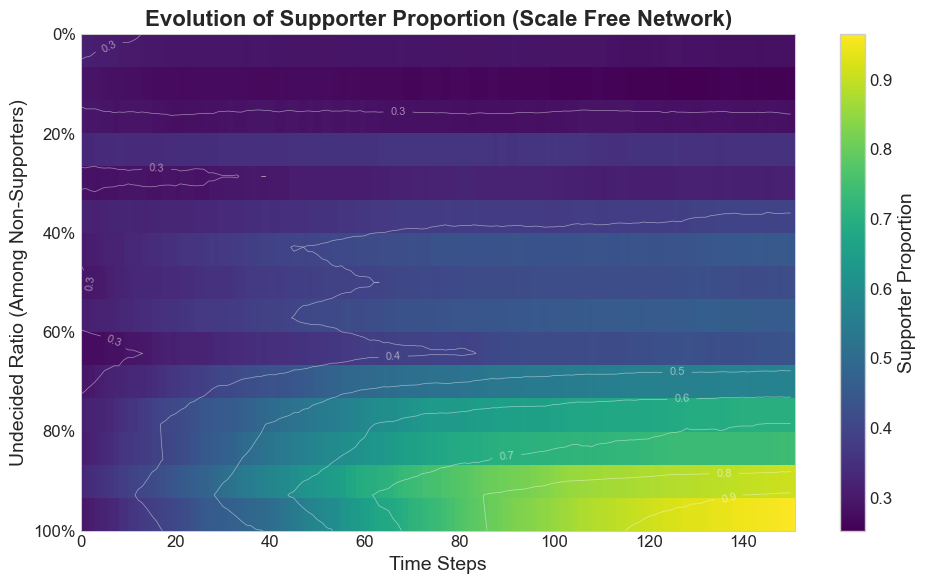

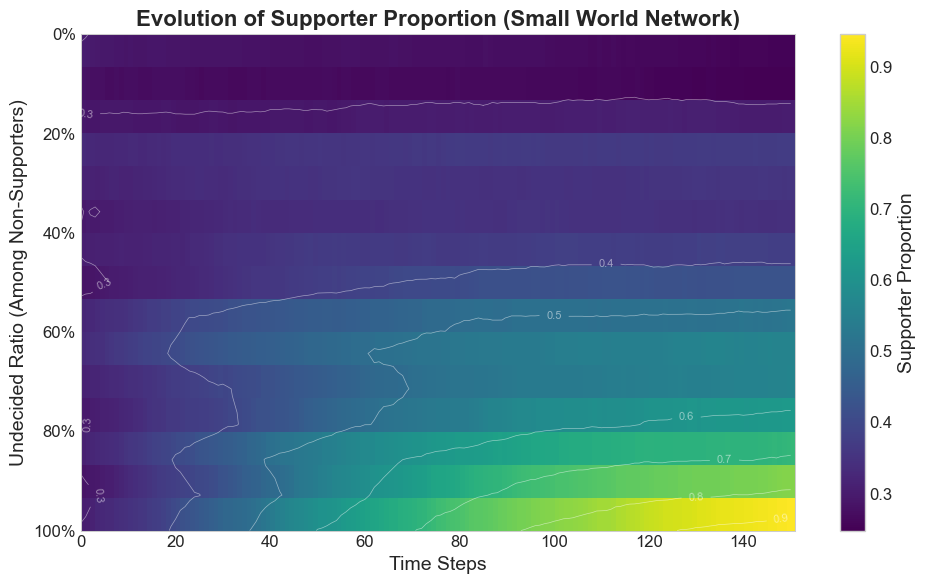

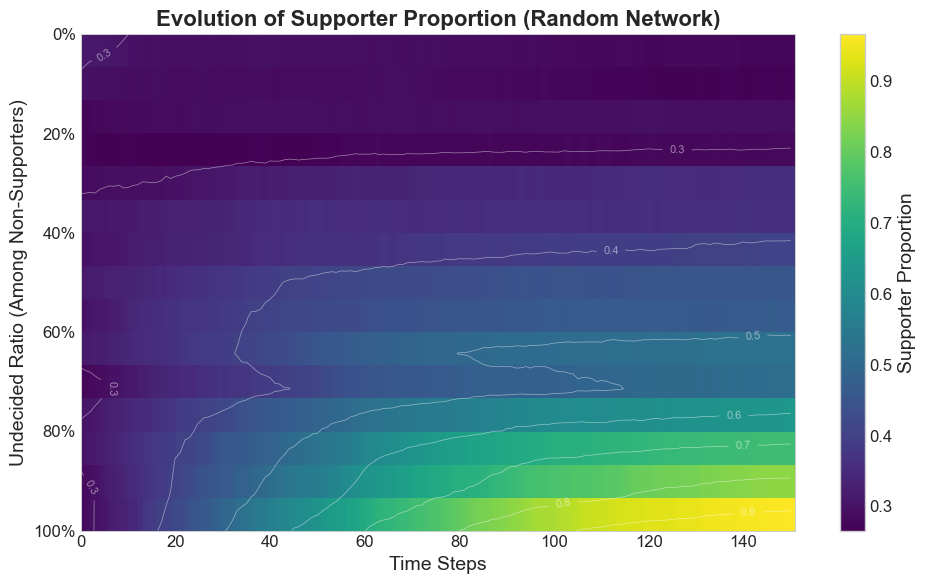

In [63]:
def create_time_evolution_heatmap(network_type):
    undecided_ratios = results[network_type]['undecided_ratios']
    
    # Sample a trial for each undecided ratio
    evolution_data = []
    for ratio in undecided_ratios:
        trial_data = results[network_type]['all_trials'][ratio][0]
        if 'history' in trial_data and trial_data['history'] is not None:
            history = trial_data['history']
            supporters = [h[SUPPORTER] for h in history]
            evolution_data.append(supporters)
    
    if not evolution_data:
        return None
    
    # Convert to numpy array
    evolution_array = np.array(evolution_data)
    
    # Create figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    
    # Create heatmap
    im = ax.imshow(evolution_array, aspect='auto', cmap='viridis', 
                   extent=[0, evolution_array.shape[1], undecided_ratios[-1], undecided_ratios[0]])
    
    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Supporter Proportion')
    
    # Add contour lines for better visibility
    x = np.arange(evolution_array.shape[1])
    y = undecided_ratios
    X, Y = np.meshgrid(x, y)
    CS = ax.contour(X, Y, evolution_array, colors='white', alpha=0.5, linewidths=0.5)
    ax.clabel(CS, inline=True, fontsize=8, fmt='%.1f')
    
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Undecided Ratio (Among Non-Supporters)')
    ax.set_title(f'Evolution of Supporter Proportion ({network_type.replace("-", " ").title()} Network)', 
                 fontweight='bold')
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Add a box around the plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.75)
    
    return fig

# Create heatmaps for each network type
for network_type in network_types:
    fig = create_time_evolution_heatmap(network_type)
    if fig:
        plt.tight_layout()
        plt.grid(False)
        plt.savefig(f"opponent_composition_evolution_{network_type}.pdf")
        plt.show()


In [60]:
summary_table = []

for network_type in network_types:
    undecided_ratios = results[network_type]['undecided_ratios']
    supporter_final = results[network_type]['supporter_final']
    
    # Find the ratio with maximum gain
    supporter_gain = np.array(supporter_final) - initial_supporter_percent
    max_gain_idx = np.argmax(supporter_gain)
    max_gain = supporter_gain[max_gain_idx]
    optimal_ratio = undecided_ratios[max_gain_idx]
    
    # Find where supporter gain crosses zero (if it does)
    crossover_points = []
    for i in range(len(supporter_gain)-1):
        if (supporter_gain[i] < 0 and supporter_gain[i+1] >= 0) or (supporter_gain[i] >= 0 and supporter_gain[i+1] < 0):
            # Linear interpolation to find more precise crossover point
            x1, x2 = undecided_ratios[i], undecided_ratios[i+1]
            y1, y2 = supporter_gain[i], supporter_gain[i+1]
            crossover = x1 + (x2 - x1) * (-y1) / (y2 - y1)
            crossover_points.append(crossover)
    
    summary_table.append({
        'Network Type': network_type.replace("-", " ").title(),
        'Max Supporter Gain': f"{max_gain:.3f}",
        'Optimal Undecided Ratio': f"{optimal_ratio:.2f}",
        'Crossover Points': ", ".join([f"{x:.2f}" for x in crossover_points]) if crossover_points else "None"
    })

summary_df = pd.DataFrame(summary_table)
display(summary_df)

# Save the summary table
summary_df.to_csv("opponent_composition_summary.csv", index=False)

,Network Type,Max Supporter Gain,Optimal Undecided Ratio,Crossover Points
0,Scale Free,0.674,1.00,0.18
1,Small World,0.656,1.00,0.13
2,Random,0.674,1.00,0.11


# Transition Rate Asymmetry

In [66]:
import matplotlib as mpl

# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/transition_rate_asymmetry/transition_rate_asymmetry_20250413_115607_n_nodes_1000_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Load summary json
summary_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/transition_rate_asymmetry_summary.json"
with open(summary_path, 'r') as f:
    summary = json.load(f)

# Extract configuration and results
config = data['config']
results = data['results']
experiment = data['experiment']
network_types = list(results.keys())

In [69]:
def create_time_evolution_plot(network_type):
    lambda_ratios = results[network_type]['lambda_ratios']
    
    # Choose a few representative ratios to show
    representative_indices = [0, len(lambda_ratios)//4, len(lambda_ratios)//2, 3*len(lambda_ratios)//4, -1]
    representative_ratios = [lambda_ratios[i] for i in representative_indices]
    
    fig, axes = plt.subplots(1, len(representative_ratios), figsize=(15, 4))
    
    for i, ratio_idx in enumerate(representative_indices):
        ratio = lambda_ratios[ratio_idx]
        ax = axes[i]
        
        # Get history for this ratio
        if ratio in results[network_type]['all_trials']:
            trial_data = results[network_type]['all_trials'][ratio][0]
            if 'history' in trial_data and trial_data['history'] is not None:
                history = trial_data['history']
                steps = range(len(history))
                
                supporters = [h[SUPPORTER] for h in history]
                undecided = [h[UNDECIDED] for h in history]
                opposition = [h[OPPOSITION] for h in history]
                
                ax.plot(steps, supporters, '-', color=SUPPORTER_COLOR, linewidth=1.5, label='Supporters')
                ax.plot(steps, undecided, '-', color=UNDECIDED_COLOR, linewidth=1.5, label='Undecided')
                ax.plot(steps, opposition, '-', color=OPPOSITION_COLOR, linewidth=1.5, label='Opposition')
                
                ax.set_title(f'λs/λo = {ratio:.2f}')
                
                if i == 0:
                    ax.set_ylabel('Opinion Proportion')
                    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
                
                ax.set_xlabel('Time Steps')
                ax.set_ylim(0, 1)
                ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
                
                # Add a box around the plot
                for spine in ax.spines.values():
                    spine.set_visible(True)
                    spine.set_linewidth(0.75)
    
    plt.suptitle(f'Time Evolution of Opinions at Different Transition Rate Ratios\n({network_type.replace("-", " ").title()} Network)', 
                 fontweight='bold')
    plt.tight_layout()
    
    return fig


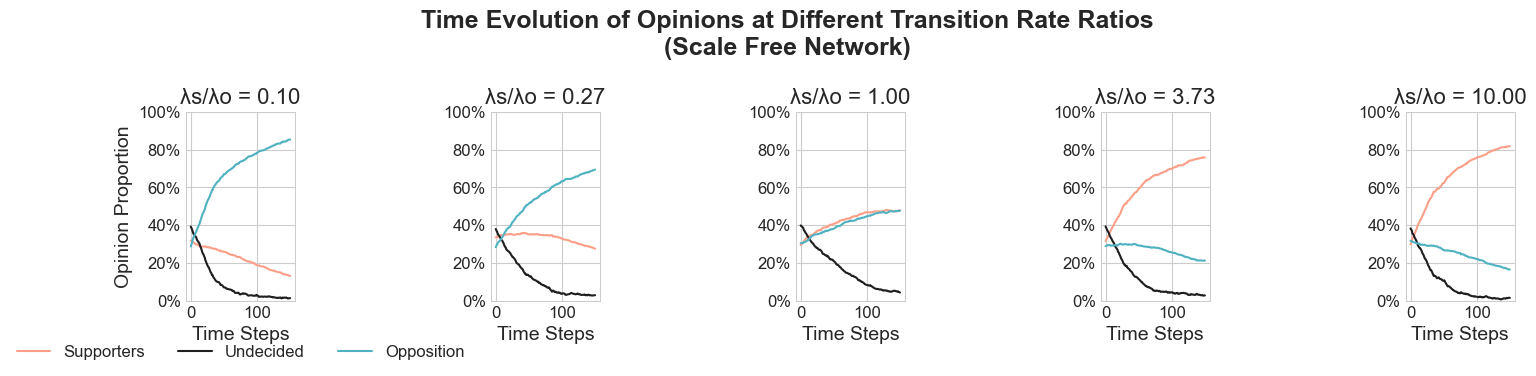

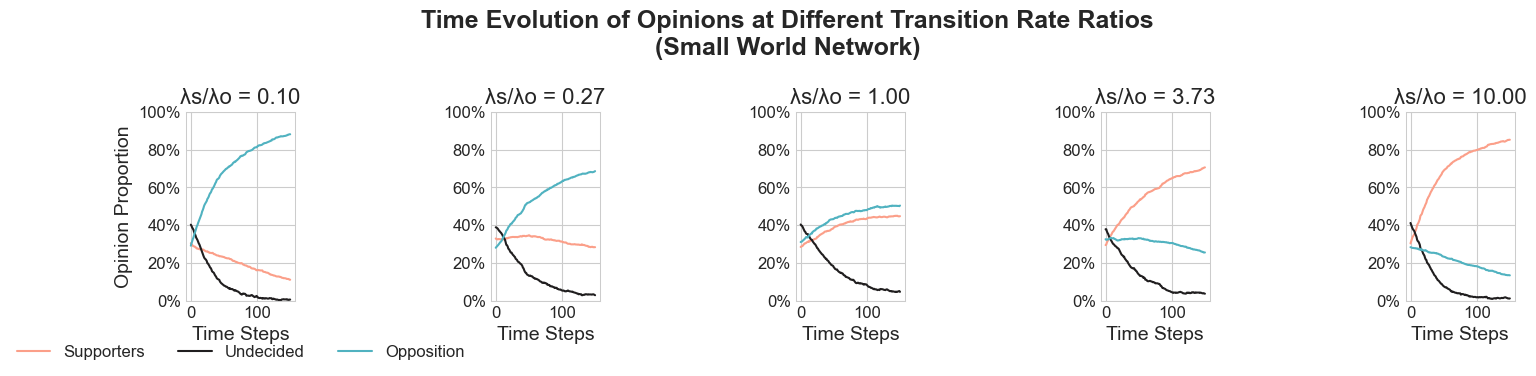

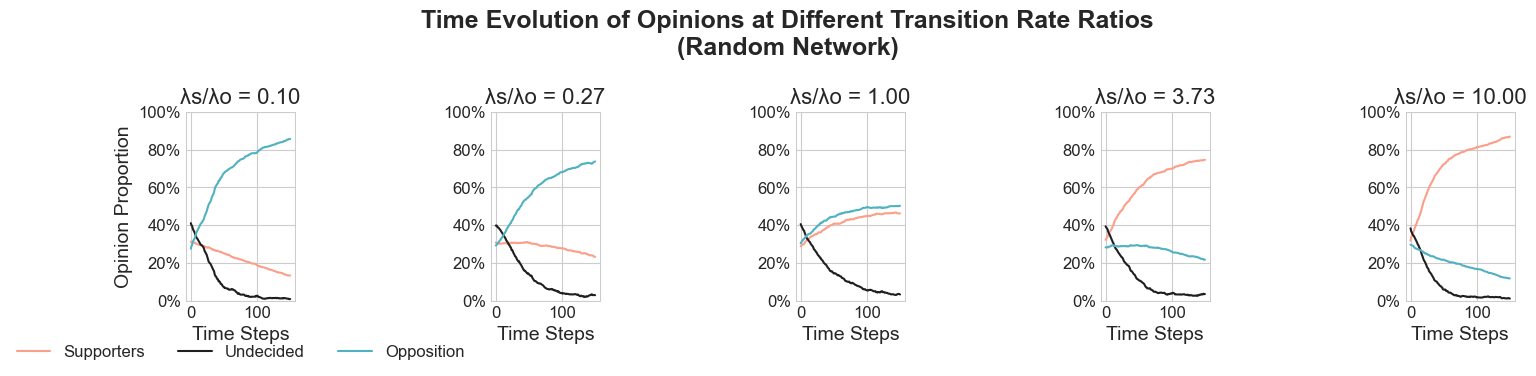

In [72]:
# Create time evolution plots for each network type
for network_type in network_types:
    try:
        fig = create_time_evolution_plot(network_type)
        plt.savefig(f"transition_rate_asymmetry_evolution_{network_type}.pdf")
        plt.show()
    except (KeyError, IndexError, ValueError) as e:
        print(f"Couldn't create evolution plot for {network_type}: {e}")

In [71]:
summary_table = []

for network_type in network_types:
    lambda_ratios = results[network_type]['lambda_ratios']
    supporter_advantage = results[network_type]['supporter_advantage']
    
    # Find critical ratio where advantage changes sign (if it exists)
    critical_ratios = []
    for i in range(len(supporter_advantage) - 1):
        if supporter_advantage[i] * supporter_advantage[i+1] <= 0:  # Sign change
            # Linear interpolation in log space
            log_x1, log_x2 = np.log10(lambda_ratios[i]), np.log10(lambda_ratios[i+1])
            y1, y2 = supporter_advantage[i], supporter_advantage[i+1]
            cross_x = 10 ** (log_x1 + (log_x2 - log_x1) * (-y1) / (y2 - y1))
            critical_ratios.append(cross_x)
    
    # Find ratio with maximum supporter advantage
    max_adv_idx = np.argmax(supporter_advantage)
    max_adv = supporter_advantage[max_adv_idx]
    max_ratio = lambda_ratios[max_adv_idx]
    
    # Find ratio with minimum supporter advantage (maximum opposition advantage)
    min_adv_idx = np.argmin(supporter_advantage)
    min_adv = supporter_advantage[min_adv_idx]
    min_ratio = lambda_ratios[min_adv_idx]
    
    summary_table.append({
        'Network Type': network_type.replace("-", " ").title(),
        'Critical Ratio(s)': ", ".join([f"{x:.2f}" for x in critical_ratios]) if critical_ratios else "None",
        'Max Supporter Advantage': f"{max_adv:.3f} at λs/λo = {max_ratio:.2f}",
        'Max Opposition Advantage': f"{-min_adv:.3f} at λs/λo = {min_ratio:.2f}"
    })

summary_df = pd.DataFrame(summary_table)
display(summary_df)

# Save the summary table
summary_df.to_csv("transition_rate_asymmetry_summary.csv", index=False)

,Network Type,Critical Ratio(s),Max Supporter Advantage,Max Opposition Advantage
0,Scale Free,0.99,0.733 at λs/λo = 10.00,0.745 at λs/λo = 0.10
1,Small World,1.02,0.749 at λs/λo = 10.00,0.757 at λs/λo = 0.10
2,Random,1.05,0.745 at λs/λo = 10.00,0.740 at λs/λo = 0.10
